In [2]:
%gui wx
import numpy as np
import matplotlib.pyplot as plt
import mayavi
from mayavi import mlab
#mlab.init_notebook(backend='x3d') #pour la 3d in jupyter
%matplotlib notebook

<IPython.core.display.Javascript object>


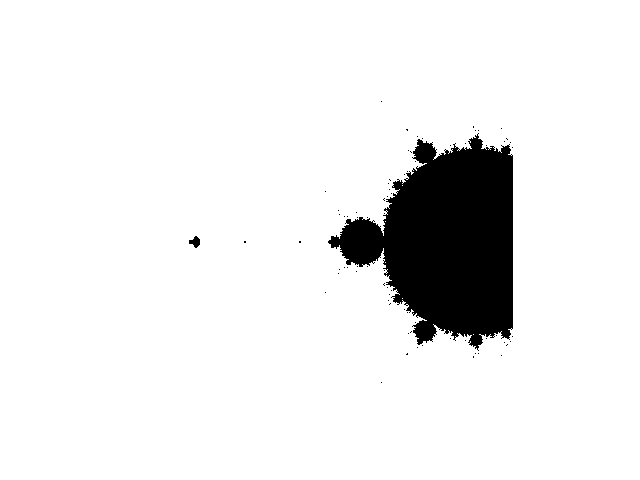

In [3]:
class Mandelbrot_disp:

    def __init__(self, x, y, facteur, t_max=100, precision=400):
        self.x = x
        self.y = y
        self.facteur = facteur
        self.t_max = t_max
        self.precision = precision

    def mandelbrot(self):
        x, y, facteur, maxiteration, precision = self.x, self.y, self.facteur, self.t_max, self.precision
        # définit l'espace avec une matrice
        X, Y = np.meshgrid(np.linspace(x-facteur, x+facteur, precision),
                           np.linspace(y-facteur, y+facteur, precision))
        c = X+1j*Y  # nombre complex écrit avec des matrices
        z = c
        # matrice booléenne qui vérifie la condition sur (z_n)
        pasbornee = np.zeros(z.shape, dtype=bool)
        for i in range(maxiteration):
            z = z**2+c
            matrice = abs(z) > 2  # condition sur le cercle
            nouvelle = matrice & ~pasbornee  # le ~est la négation logique
            pasbornee[nouvelle] = True
            # valeur arbitraire pour éviter les overflow je limite la valeur =>
            z[matrice] = 1
            # prévient le problème des deux ci-dessous
        return pasbornee  # renvoi de la matrice booleenne qui indique si la valeur est bornée


    def disp_mandel(self):
        mandel = self.mandelbrot()
        plt.figure()
        plt.imshow(mandel, cmap='bone')  # interpolation induite
        plt.axis('off')
        plt.show()

    def animate_mandel_plt(self, openvid=True):
        im_init = self.mandelbrot()
        fig = plt.figure()
        im = plt.imshow(im_init, cmap='bone')
        plt.axis('off')
        def animate(i):
            im.set_data(Mandelbrot_disp(self.x-i/900, self.y, 0.7-i/300,
                                        t_max=100, precision=300).mandelbrot())
            return im,

        anim = animation.FuncAnimation(fig, animate, frames=210,interval=2, repeat=False,save_count=200)
        return(anim)
    
    def mandel_loop(self):
        x, y = np.ogrid[self.x-self.facteur:self.x+self.facteur:(self.precision*1j),
                        self.y-self.facteur:self.y+self.facteur:(self.precision*1j)]
        c = x + 1j * y
        z=np.zeros(c.shape)
        mandel = np.zeros(c.shape)
        for i in range(50):
            z = z ** 2 + c
            mandel += 1 / float(2 + i) * (z * np.conj(z) > 4)
        return(mandel)

        


Mandelbrot_disp(-1.401155, 0, 0.5, precision=900).disp_mandel()

In [ ]:
mlab.figure(size=(800, 800))
mandel = Mandelbrot_disp(-.5, 0, 1.5, precision=900).mandel_loop()
mlab.surf(mandel, colormap='hot', warp_scale='auto', vmax=1.5)
cam,foc = move()

In [7]:
import os
def save():
    os.system("ffmpeg -r 20 -i ./anim_tests/pure_beauty%1d.png -vcodec mpeg4 -y movie.mp4")
save()

In [5]:
mlab.figure(size=(800, 800))
mandel = Mandelbrot_disp(-.5, 0, 1.5, precision=900).mandel_loop()
mlab.surf(mandel, colormap='hot', warp_scale='auto', vmax=1.5)

for t in range(0,360,1):
    mlab.view(elevation=360-t)
    mlab.savefig('./anim_tests/pure_beauty'+str(t)+'.png')
    
mlab.close()

In [5]:
x, y = np.ogrid[-1.5:1.5:800j, -1.5:1.55:800j]
c = x + 1j * y
z=np.zeros(c.shape)
mandel = np.zeros(c.shape)

for i in range(50):
    z = z ** 2 + c
    mandel += 1 / float(2 + i) * (z * np.conj(z) > 4)

# Display it
mlab.figure(size=(800, 800))
mlab.surf(mandel, colormap='hot', warp_scale='auto', vmax=1.5)
#plt.imshow(mandel)

C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in square
  import sys
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


In [3]:
x, y = np.ogrid[-2:2:800j, -2:2:800j]
c = x + 1j * y
z=np.zeros(c.shape)
mandel = np.zeros(c.shape)

for i in range(50):
    z = ((z ** 2 + c -1)/(2*z +c-2))**2
    mandel += 1 / float(2 + i) * (z * np.conj(z) > 4)

# Display it
mlab.figure(size=(800, 800))
mlab.surf(mandel, colormap='gist_earth', warp_scale='auto', vmax=1.5)

C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in square
  import sys
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow enco

In [4]:
# Calculate the Julia set on a grid
x, y = np.ogrid[-1.5:1:500j, -1.5:1.5:500j]
z = x + 1j * y

julia = np.zeros(z.shape)

for i in range(100):
    z = z ** 2 - 0.70176 - 0.3842j
    julia += 1 / float(2 + i) * (z * np.conj(z) > 4)

# Display it
mlab.figure(size=(400, 300))
mlab.surf(julia, colormap='gist_earth', warp_scale='auto', vmax=1.5)

# A view into the "Canyon"
mlab.view(65, 27, 322, [30., -13.7,  136])
mlab.show()

C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in square
  
C:\Users\tangu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [ ]:
x, y = np.ogrid[-10:10:800j, -10:10:800j]
c = x + 1j * y
z=np.zeros(c.shape)
mandel = np.zeros(c.shape)

for i in range(50):
    z = z**2+c
    mandel += 1 / float(2 + i) * (z * np.conj(z) > 4)

# Display it
mlab.figure(size=(800, 800))
mlab.surf(mandel, colormap='gist_earth', warp_scale='auto', vmax=1.5)